In [10]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Connect to my database

conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [11]:
import pandas as pd

# Query to get the data
query = """
SELECT date, location, opponent, 
       fg_1_19, fg_20_29, fg_30_39, fg_40_49, fg_50_plus, longest_fg, fg_percentage, fg_made, xp_made, points_scored, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Oregon_Kicking_Stats;
"""

oregon_kicking = pd.read_sql(query, conn)

# FG data provided as a list of strings
fg_data = [
    "1-1", "3-3", "2-2", "0-0", "0-1", "1-2", "1-2", "0-0", "0-1", "1-2",
    "0-0", "1-2", "1-1", "1-1", "1-1", "0-0", "2-2", "3-3", "1-1", "0-0",
    "1-1", "0-0", "0-0", "2-3", "2-2", "2-2", "0-1", "1-1", "0-0", "2-2",
    "2-2", "1-1", "1-1", "0-0", "1-1", "1-1", "1-1", "0-2", "1-1", "1-2",
    "1-1", "0-1", "0-1", "1-2", "1-1", "1-1", "1-1", "1-1", "0-1", "0-0",
    "0-0", "0-1", "1-2", "1-1", "0-0", "3-3", "0-0", "0-1", "0-0", "1-2",
    "3-3", "0-0", "0-0", "0-0", "0-1", "1-1", "0-1", "1-2", "2-2", "0-0",
    "0-1", "1-2", "1-1", "0-0", "0-0", "0-0", "0-1", "0-0", "0-0", "1-1",
    "1-1", "0-0", "0-1", "2-2", "1-1", "2-3", "2-2", "0-0", "1-1", "1-1",
    "0-0", "1-1", "0-0", "0-0", "0-0", "4-5", "0-0", "0-1", "1-2", "1-1",
    "2-2", "0-0", "4-4", "0-0", "2-2", "1-1", "2-3", "2-2", "3-3", "1-1",
    "2-2", "1-2", "2-2", "0-0", "1-1", "0-0", "1-2", "1-1", "0-0", "1-2",
    "1-1", "1-1", "3-3", "1-1", "2-2", "3-4", "1-1", "2-2", "1-1", "1-1",
    "1-2", "0-0", "0-0", "1-1", "0-0", "0-1", "0-0", "1-1", "1-1", "1-2",
    "3-4"
]

# Ensure the length of fg_data matches the length of ucla_kicking DataFrame
if len(fg_data) == len(oregon_kicking):
    # Add the FG data to the DataFrame
    oregon_kicking['FG'] = fg_data

    # Split FG column into separate columns for makes and attempts
    oregon_kicking[['fg_makes', 'fg_attempts']] = oregon_kicking['FG'].str.split('-', expand=True)

    # Convert the makes and attempts columns to numeric, handling non-numeric cases
    oregon_kicking['fg_makes'] = pd.to_numeric(oregon_kicking['fg_makes'], errors='coerce')
    oregon_kicking['fg_attempts'] = pd.to_numeric(oregon_kicking['fg_attempts'], errors='coerce')

    # Calculate FG percentage
    oregon_kicking['fg_percentage'] = (oregon_kicking['fg_makes'] / oregon_kicking['fg_attempts']) * 100

    # Handle any potential divisions by zero (e.g., if attempts are 0)
    oregon_kicking['fg_percentage'] = oregon_kicking['fg_percentage'].fillna(0)

    # Display the first few rows of the data
    print(oregon_kicking.head())
else:
    print(f"Length of fg_data ({len(fg_data)}) does not match length of DataFrame ({len(oregon_kicking)}).")
    


         date location        opponent  fg_1_19  fg_20_29  fg_30_39  fg_40_49  \
0  2023-09-02        H  Portland State        0         0         0         1   
1  2023-09-09        @      Texas Tech        0         2         1         0   
2  2023-09-16        H          Hawaii        0         1         0         1   
3  2023-09-23        H        Colorado        0         0         0         0   
4  2023-09-30        @        Stanford        0         0         0         0   

   fg_50_plus  longest_fg  fg_percentage  ...  xp_made  points_scored  temp_f  \
0           0          41          100.0  ...        6              9    67.2   
1           0          34          100.0  ...        3             12    82.8   
2           0          43          100.0  ...        7             13    67.8   
3           0           0            0.0  ...        4              4    60.5   
4           0           0            0.0  ...        6              6    62.3   

   precipitation_in  winds

/var/folders/d0/gj8tfnxn3jd2gjx88tk4mp180000gn/T/ipykernel_62030/1824138784.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  oregon_kicking = pd.read_sql(query, conn)


In [12]:
# Check the number of rows in the ucla_kicking DataFrame
num_rows = len(oregon_kicking)
print(f"Number of rows in ucla_kicking: {num_rows}")

# Check the length of the fg_data list
num_fg_data = len(fg_data)
print(f"Number of entries in fg_data: {num_fg_data}")

# Check if there is a discrepancy
if num_rows != num_fg_data:
    print("Discrepancy found between the number of rows in ucla_kicking and the length of fg_data.")
else:
    print("The number of rows matches the length of fg_data.")


Number of rows in ucla_kicking: 141
Number of entries in fg_data: 141
The number of rows matches the length of fg_data.


In [3]:
# Lets see how many instances of each wind speed fall under arbitrary ranges


# Define the wind speed ranges
wind_speed_bins = [0, 5, 10, 15, 20, float('inf')]
wind_speed_labels = ['0-5 mph', '5-10 mph', '10-15 mph', '15-20 mph', '20+ mph']

# Create a new column in the dataframe for wind speed ranges
oregon_kicking['Wind_Speed_Range'] = pd.cut(oregon_kicking['windspeed_mph'], bins=wind_speed_bins, labels=wind_speed_labels, right=False)

# Count the number of observations in each wind speed range
wind_speed_distribution = oregon_kicking['Wind_Speed_Range'].value_counts().sort_index()

# Display the distribution
print(wind_speed_distribution)


Wind_Speed_Range
0-5 mph      34
5-10 mph     60
10-15 mph    29
15-20 mph    14
20+ mph       4
Name: count, dtype: int64


In [13]:
oregon_kicking['Wind_Range'] = pd.cut(
    oregon_kicking['windspeed_mph'], 
    bins=[-np.inf, 5, 10, 15, 20, 100], 
    labels=['<5', '5-10', '10-15', '15-20', '20+']
)

/var/folders/d0/gj8tfnxn3jd2gjx88tk4mp180000gn/T/ipykernel_62030/3890467483.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_speed_fg_totals = oregon_kicking.groupby('Wind_Speed_Range').agg({'fg_makes': 'sum', 'fg_attempts': 'sum'})


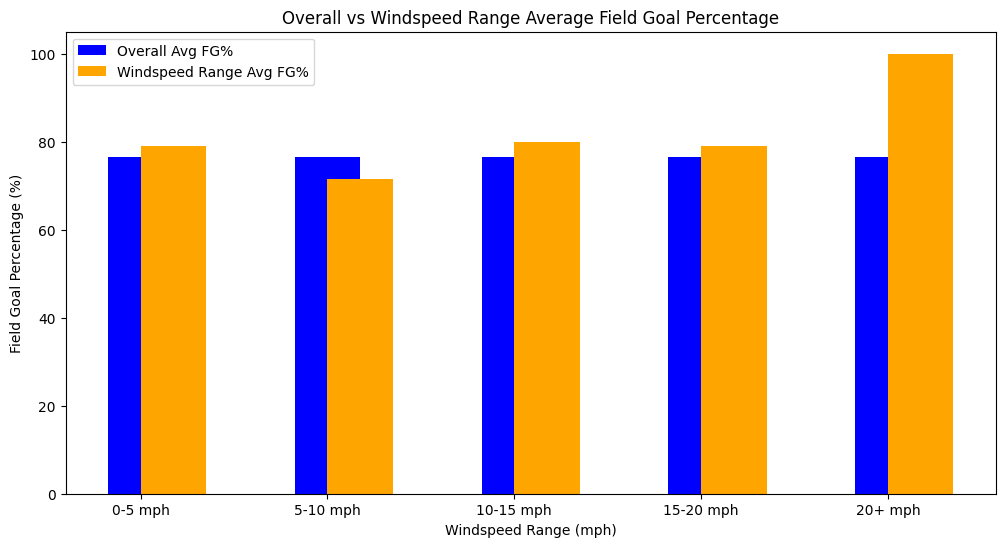

In [14]:
# Define the wind speed ranges
wind_speed_bins = [0, 5, 10, 15, 20, float('inf')]
wind_speed_labels = ['0-5 mph', '5-10 mph', '10-15 mph', '15-20 mph', '20+ mph']

# Create a new column in the dataframe for wind speed ranges
oregon_kicking['Wind_Speed_Range'] = pd.cut(oregon_kicking['windspeed_mph'], bins=wind_speed_bins, labels=wind_speed_labels, right=False)

# Calculate total FG makes and attempts for each wind speed range
wind_speed_fg_totals = oregon_kicking.groupby('Wind_Speed_Range').agg({'fg_makes': 'sum', 'fg_attempts': 'sum'})

# Calculate FG percentage for each wind speed range
wind_speed_fg_totals['Wind_Range_Avg_FG%'] = (wind_speed_fg_totals['fg_makes'] / wind_speed_fg_totals['fg_attempts']) * 100

# Calculate the overall FG percentage across all wind speed ranges
overall_fg_makes = oregon_kicking['fg_makes'].sum()
overall_fg_attempts = oregon_kicking['fg_attempts'].sum()
overall_avg_fg = (overall_fg_makes / overall_fg_attempts) * 100

# Prepare data for plotting
avg_data = pd.DataFrame({
    'Wind_Range': wind_speed_fg_totals.index,
    'Overall_Avg_FG%': [overall_avg_fg] * len(wind_speed_fg_totals),
    'Wind_Range_Avg_FG%': wind_speed_fg_totals['Wind_Range_Avg_FG%'].values
})

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(avg_data['Wind_Range'], avg_data['Overall_Avg_FG%'], width=bar_width, label='Overall Avg FG%', color='blue', align='center')
plt.bar(avg_data['Wind_Range'], avg_data['Wind_Range_Avg_FG%'], width=bar_width, label='Windspeed Range Avg FG%', color='orange', align='edge')

plt.xlabel('Windspeed Range (mph)')
plt.ylabel('Field Goal Percentage (%)')
plt.title('Overall vs Windspeed Range Average Field Goal Percentage')
plt.legend()

plt.show()

